# Seaborn
Seaborn (essentially a prettier version of Matplotlib) I use this when I want my exploratory analysis to look pretty for other people. For me it covers a good variety of plots and offers a great balance between effort and beauty so it tends to be my go to visualization library. I then rely on other libraries for more niche or involved visualizations.
https://towardsdatascience.com/develop-interactive-plots-in-one-line-of-python-code-fde434f39ee8
https://seaborn.pydata.org/tutorial/function_overview.html

In [11]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## graph-1

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

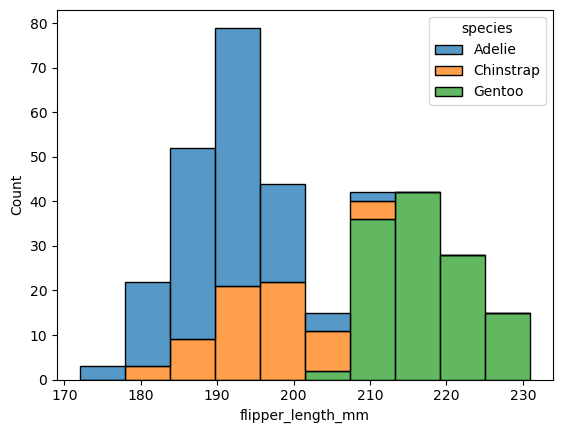

In [6]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

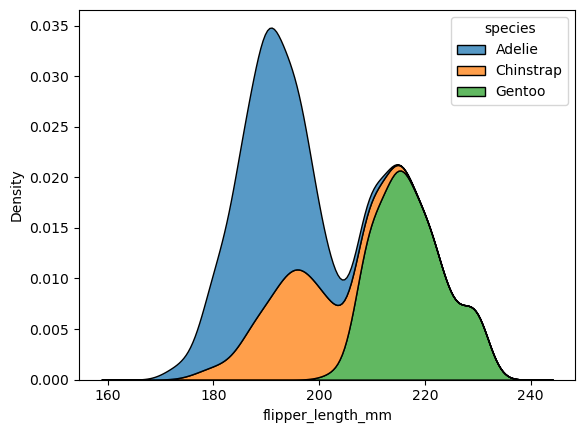

In [7]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

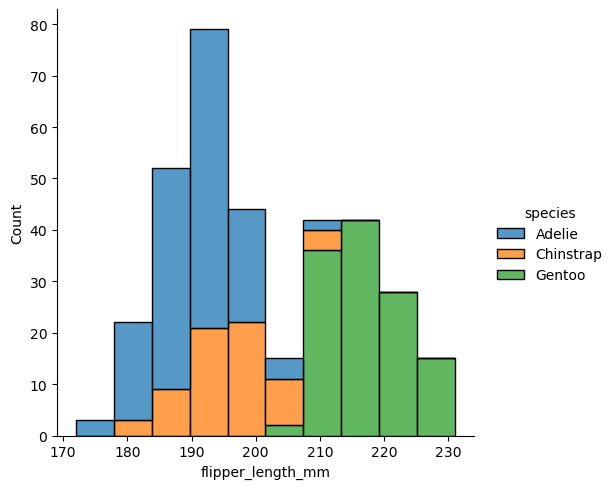

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

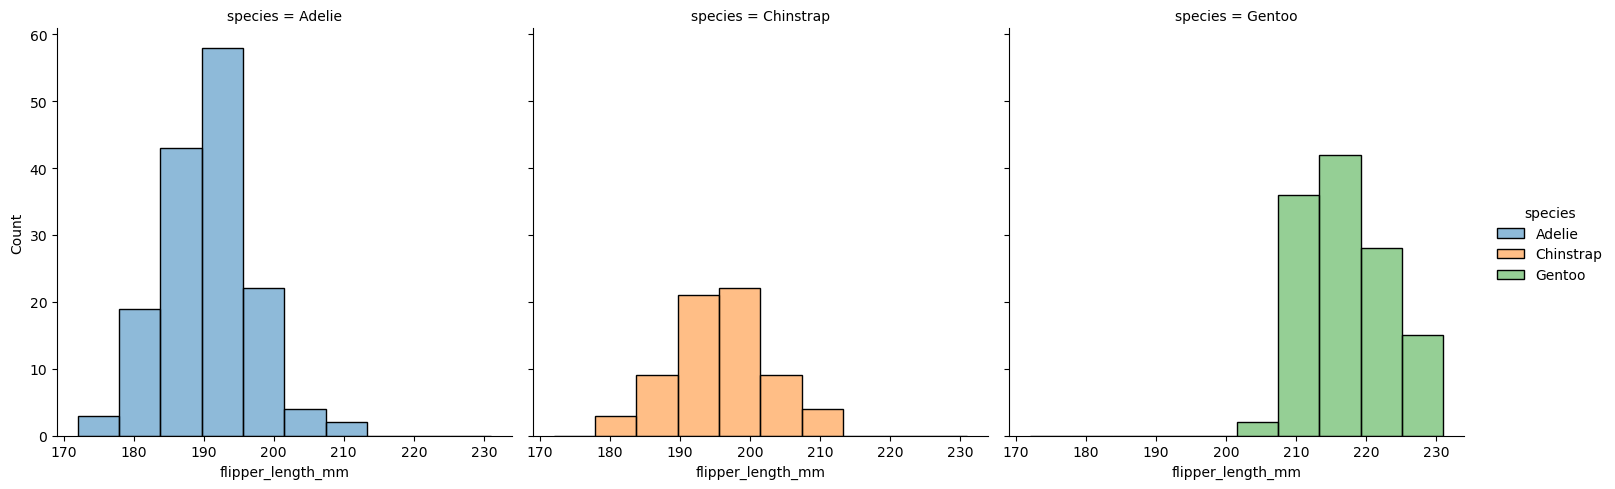

In [9]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

## Axes-level functions make self-contained plots
The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

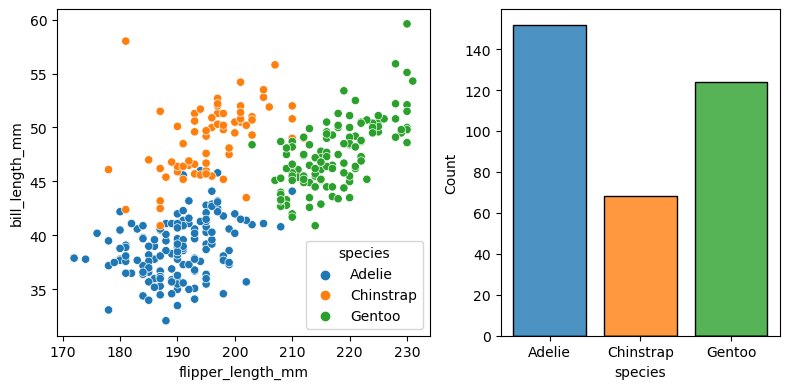

In [12]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

## Figure-level functions own their figure
In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

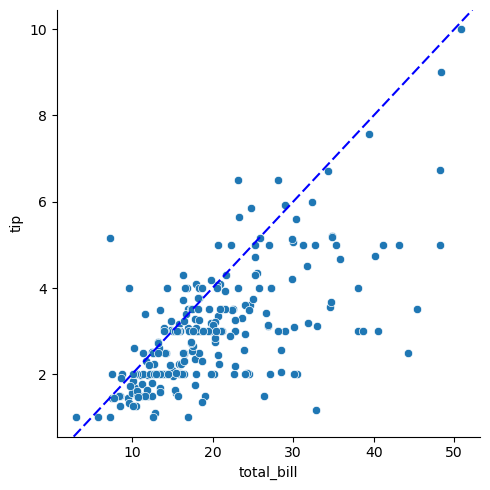

In [13]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

## Customizing plots from a figure-level function
The figure-level functions return a FacetGrid instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:
While convenient, this does add a bit of extra complexity, as you need to remember that this method is not part of the matplotlib API and exists only when using a figure-level function.

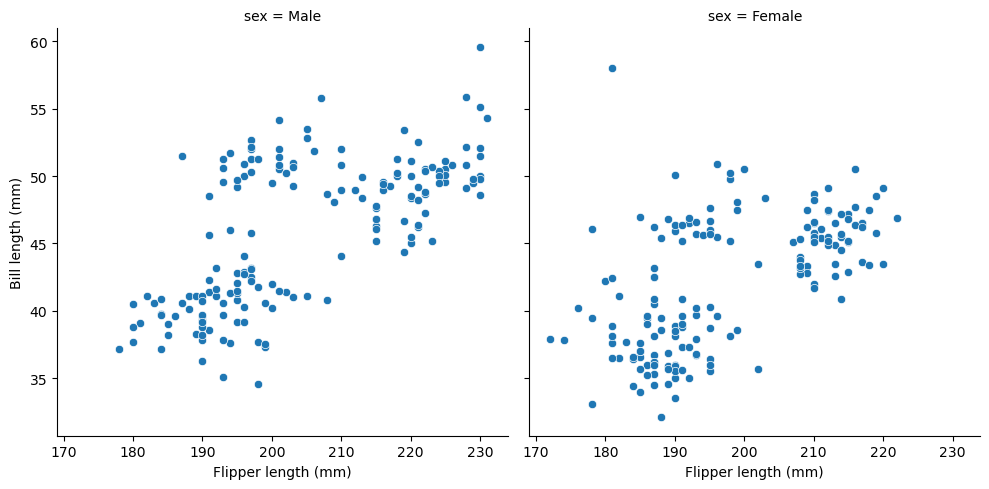

In [14]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

## Specifying figure sizes
To increase or decrease the size of a matplotlib plot, you set the width and height of the entire figure, either in the global rcParams, while setting up the plot (e.g. with the figsize parameter of matplotlib.pyplot.subplots()), or by calling a method on the figure object (e.g. matplotlib.Figure.set_size_inches()). When using an axes-level function in seaborn, the same rules apply: the size of the plot is determined by the size of the figure it is part of and the axes layout in that figure.

When using a figure-level function, there are several key differences. First, the functions themselves have parameters to control the figure size (although these are actually parameters of the underlying FacetGrid that manages the figure). Second, these parameters, height and aspect, parameterize the size slightly differently than the width, height parameterization in matplotlib (using the seaborn parameters, width = height * aspect). Most importantly, the parameters correspond to the size of each subplot, rather than the size of the overall figure

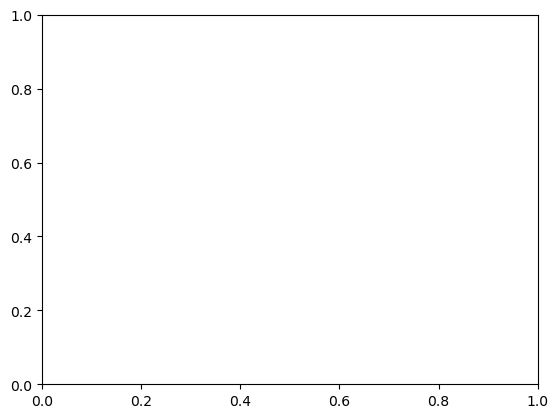

In [15]:
f, ax = plt.subplots()

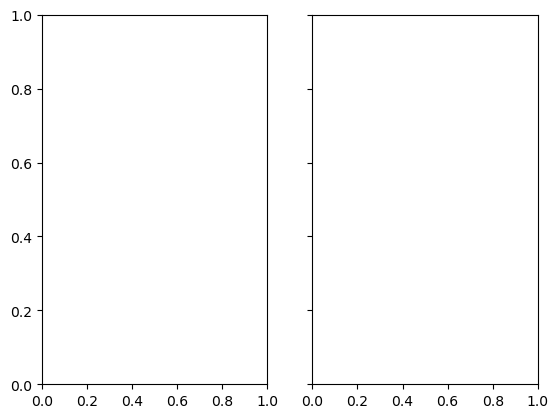

In [16]:
# A figure with multiple columns will have the same overall size, 
#but the axes will be squeezed horizontally to fit in the space:
f, ax = plt.subplots(1, 2, sharey=True)

In contrast, a plot created by a figure-level function will be square. To demonstrate that, let’s set up an empty plot by using FacetGrid directly. This happens behind the scenes in functions like relplot(), displot(), or catplot():

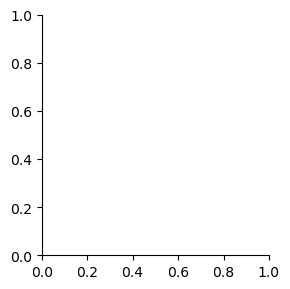

In [17]:
g = sns.FacetGrid(penguins)

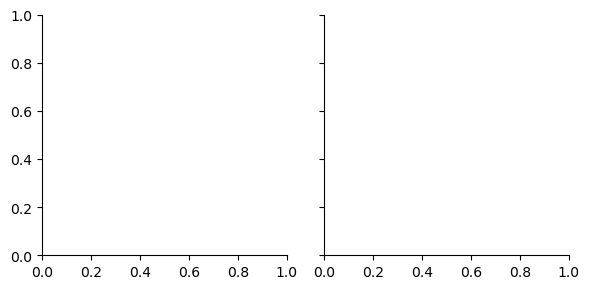

In [18]:
#When additional columns are added, the figure itself will become wider, 
#so that its subplots have the same size and shape:
g = sns.FacetGrid(penguins, col="sex")

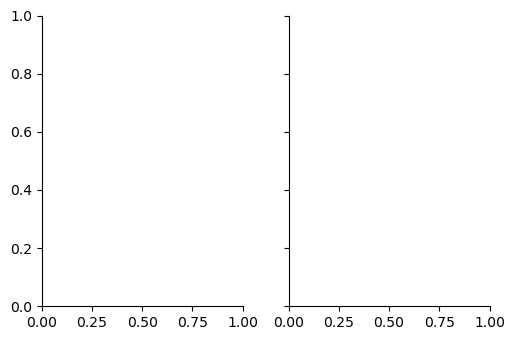

In [19]:
#And you can adjust the size and shape of each subplot without accounting for the 
#total number of rows and columns in the figure:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

The upshot is that you can assign faceting variables without stopping to think about how you’ll need to adjust the total figure size. A downside is that, when you do want to change the figure size, you’ll need to remember that things work a bit differently than they do in matplotlib.

In [ ]:
Relative merits of figure-level functions
Here is a summary of the pros and cons that we have discussed above:

Advantages
Easy faceting by data variables
Legend outside of plot by default
Easy figure-level customization
Different figure size parameterization

Drawbacks
Many parameters not in function signature
Legend outside of plot by default
Cannot be part of a larger matplotlib figure
Different API from matplotlib
Different figure size parameterization

## Combining multiple views on the data
Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively.

jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

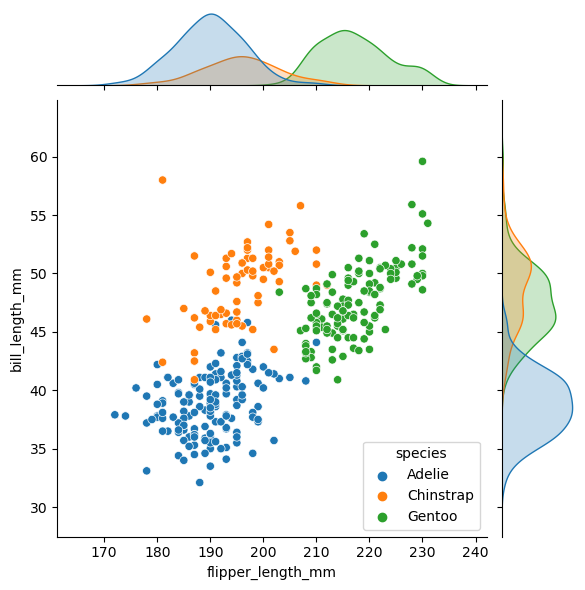

In [20]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

pairplot() is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:
Behind the scenes, these functions are using axes-level functions that you have already met (scatterplot() and kdeplot()), and they also have a kind parameter that lets you quickly swap in a different representation:

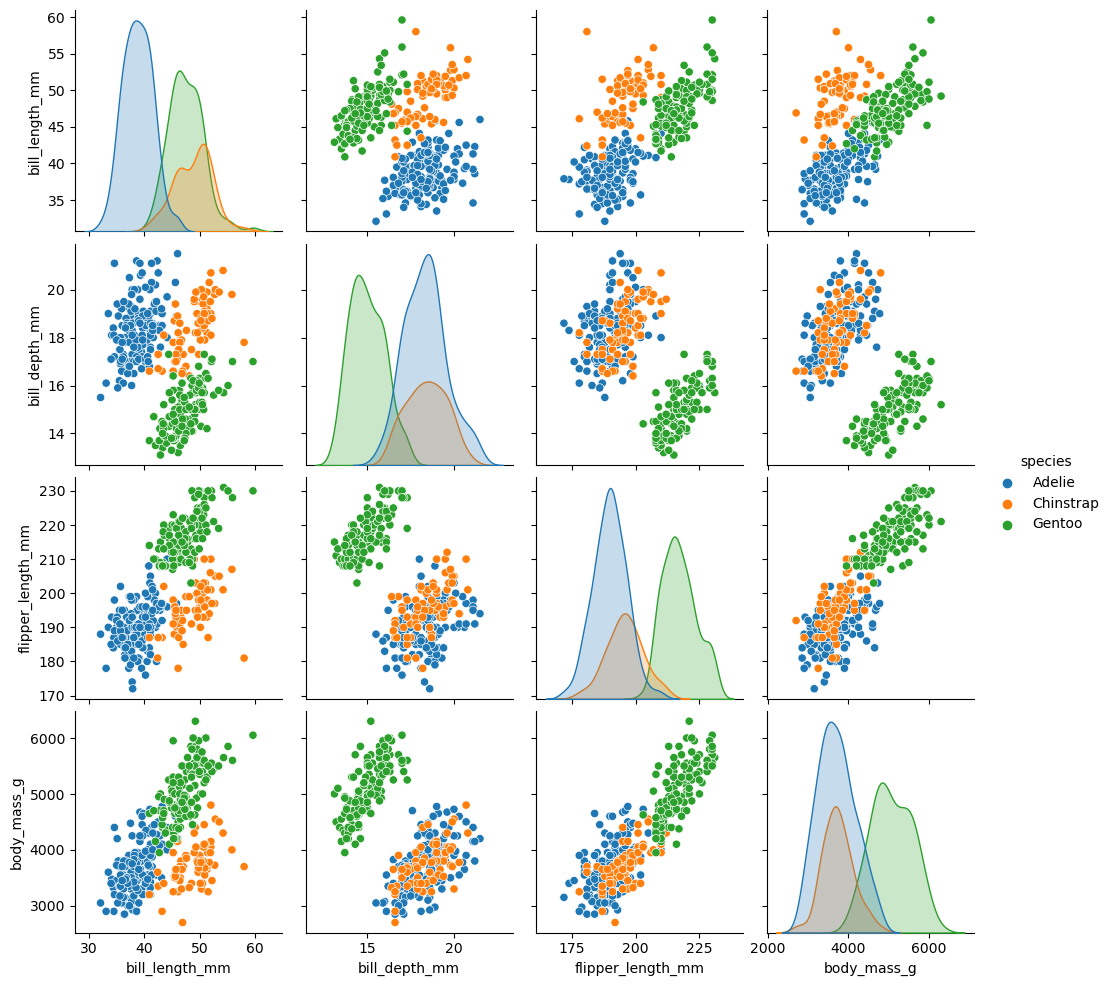

In [21]:
sns.pairplot(data=penguins, hue="species")

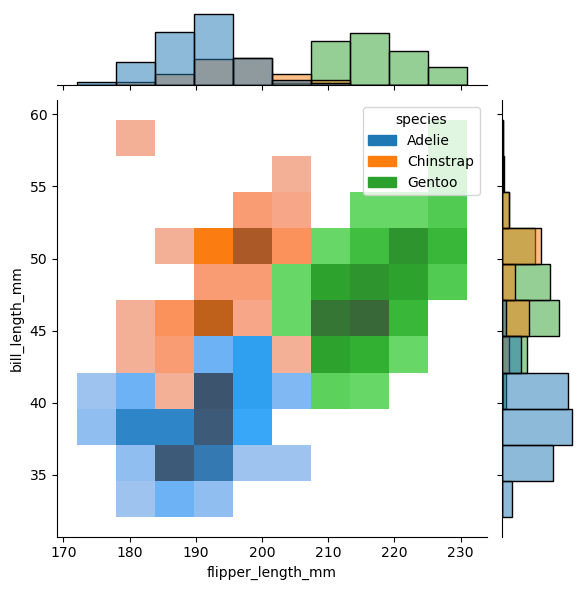

In [22]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

## Data structures accepted by seaborn
https://seaborn.pydata.org/tutorial/data_structure.html
 Seaborn supports several different dataset formats, and most functions accept data represented with objects from the pandas or numpy libraries as well as built-in Python types like lists and dictionaries. Understanding the usage patterns associated with these different options will help you quickly create useful visualizations for nearly any dataset.

### Long  Form
A long-form data table has the following characteristics:
Each variable is a column
Each observation is a row
As a simple example, consider the “flights” dataset, which records the number of airline passengers who flew in each month from 1949 to 1960. This dataset has three variables (year, month, and number of passengers):
With long-form data, columns in the table are given roles in the plot by explicitly assigning them to one of the variables. For example, making a monthly plot of the number of passengers per year looks like this
The advantage of long-form data is that it lends itself well to this explicit specification of the plot. It can accommodate datasets of arbitrary complexity, so long as the variables and observations can be clearly defined. But this format takes some getting used to, because it is often not the model of the data that one has in their head.

In [23]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


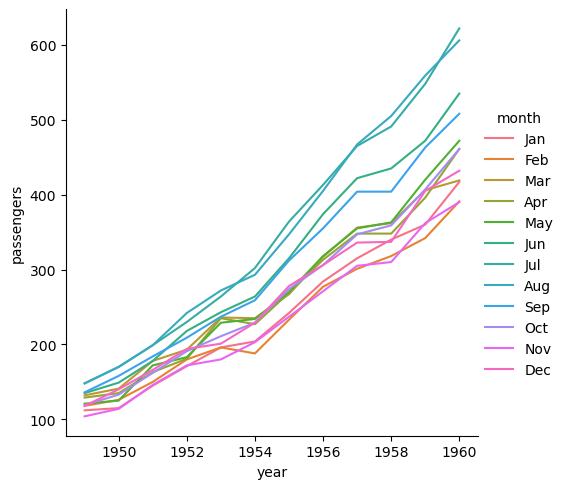

In [24]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

### Wide-form data
For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years:
Here we have the same three variables, but they are organized differently. The variables in this dataset are linked to the dimensions of the table, rather than to named fields. Each observation is defined by both the value at a cell in the table and the coordinates of that cell with respect to the row and column indices.

With long-form data, we can access variables in the dataset by their name. That is not the case with wide-form data. Nevertheless, because there is a clear association between the dimensions of the table and the variable in the dataset, seaborn is able to assign those variables roles in the plot.
Seaborn treats the argument to data as wide form when neither x nor y are assigned

In [25]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


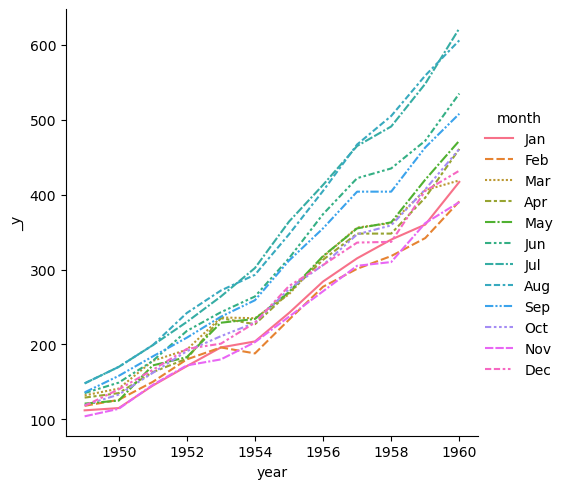

In [26]:
sns.relplot(data=flights_wide, kind="line")

This plot looks very similar to the one before. Seaborn has assigned the index of the dataframe to x, the values of the dataframe to y, and it has drawn a separate line for each month. There is a notable difference between the two plots, however. When the dataset went through the “pivot” operation that converted it from long-form to wide-form, the information about what the values mean was lost. As a result, there is no y axis label. (The lines also have dashes here, because relplot() has mapped the column variable to both the hue and style semantic so that the plot is more accessible. We didn’t do that in the long-form case, but we could have by setting style="month").

Thus far, we did much less typing while using wide-form data and made nearly the same plot. This seems easier! But a big advantage of long-form data is that, once you have the data in the correct format, you no longer need to think about its structure. You can design your plots by thinking only about the variables contained within it. For example, to draw lines that represent the monthly time series for each year, simply reassign the variables:

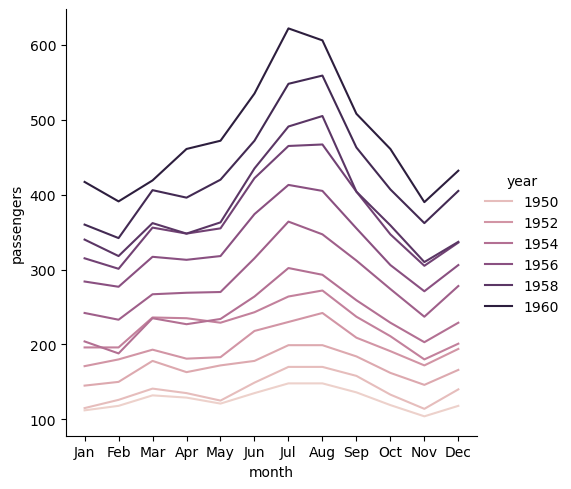

In [27]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

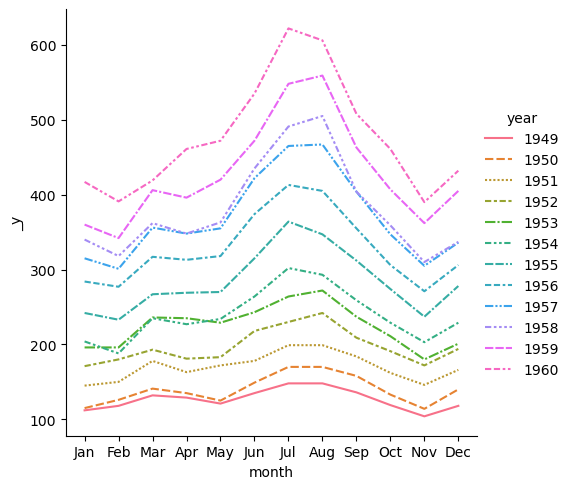

In [28]:
#To achieve the same remapping with the wide-form dataset, we would need to transpose the table:
sns.relplot(data=flights_wide.transpose(), kind="line")

(This example also illustrates another wrinkle, which is that seaborn currently considers the column variable in a wide-form dataset to be categorical regardless of its datatype, whereas, because the long-form variable is numeric, it is assigned a quantitative color palette and legend. This may change in the future).

The absence of explicit variable assignments also means that each plot type needs to define a fixed mapping between the dimensions of the wide-form data and the roles in the plot. Because this natural mapping may vary across plot types, the results are less predictable when using wide-form data. For example, the categorical plots assign the column dimension of the table to x and then aggregate across the rows (ignoring the index):

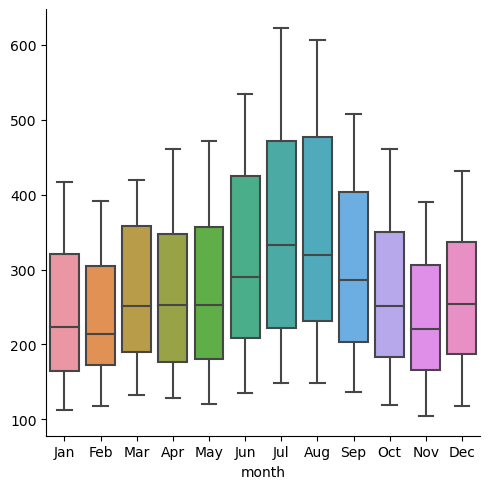

In [29]:
sns.catplot(data=flights_wide, kind="box")

When using pandas to represent wide-form data, you are limited to just a few variables (no more than three). This is because seaborn does not make use of multi-index information, which is how pandas represents additional variables in a tabular format. The xarray project offers labeled N-dimensional array objects, which can be considered a generalization of wide-form data to higher dimensions. At present, seaborn does not directly support objects from xarray, but they can be transformed into a long-form pandas.DataFrame using the to_pandas method and then plotted in seaborn like any other long-form data set.

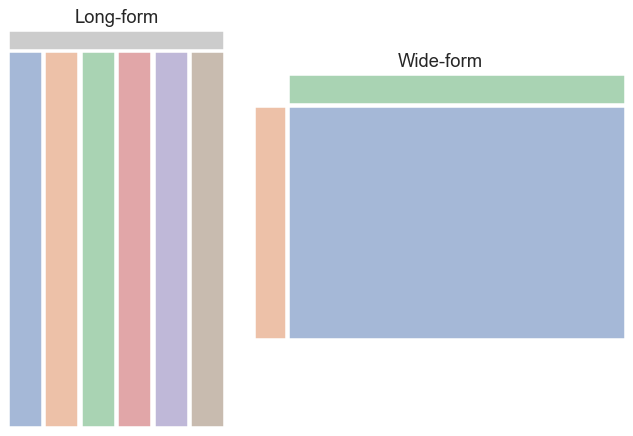

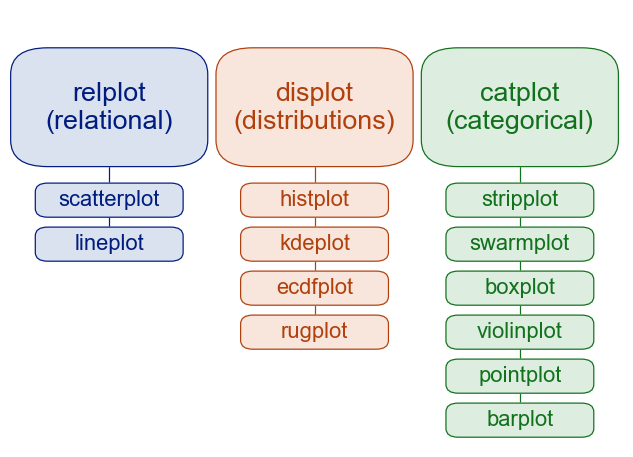